# Random Forest Classification

Random Forest is an ensemble learning method for classification, regression, and other tasks, that operates by constructing a multiple of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

We use the Random Forest classifier to predict the type of products bought based on factors like income and places. The accuracy of the model is evaluated on both the training and test sets. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, classification_report
import datetime


In [2]:
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe: 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1 
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
        altered = altered.dropna()
    return altered

In [280]:
customerdf = pd.read_csv('Datasets/cleaned_customer.csv')

In [281]:
customerdf_joint = customerdf.loc[:, ['Income','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Recency']]
customerdf_joint['Dt_Customer'] = pd.to_datetime(customerdf_joint['Dt_Customer'], format='%d-%m-%Y')
customerdf_joint['CurrentDate'] = datetime.datetime(2021, 1, 1)
customerdf_joint['numMonths'] = ((customerdf_joint['CurrentDate'] - customerdf_joint['Dt_Customer'])/np.timedelta64(1, 'M'))
customerdf_joint['Recency'] = customerdf_joint['Recency']/30 #assume 30days in a month

In [282]:
#average purchases over the months
for var in customerdf_joint.columns[1:10]:
    customerdf_joint[var] = customerdf_joint[var]/ customerdf_joint["numMonths"]

customerdf_joint.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)
customerdf_joint.head()

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,58138.0,0.081552,0.101940,0.040776,6.473200,0.897073,5.565932,1.753371,0.897073,0.897073
1,46344.0,0.012445,0.012445,0.024890,0.136893,0.012445,0.074669,0.024890,0.012445,0.074669
2,71613.0,0.092193,0.023048,0.115242,4.909294,0.564684,1.463569,1.279182,0.242007,0.484015
3,26646.0,0.024632,0.000000,0.049265,0.135479,0.049265,0.246325,0.123162,0.036949,0.061581
4,58293.0,0.061048,0.036629,0.073257,2.112249,0.525010,1.440725,0.561638,0.329657,0.183143


### Convert Amounts to Binary Purchased/Not Purchased
analyse the distribution of each product to determine the appropriate threshold so that there is balance in data distribution. 

Statistics for MntWines:
count    2216.000000
mean        3.433968
std         3.772785
min         0.000000
50%         1.998282
75%         5.738165
80%         6.647605
85%         7.851326
90%         9.113894
95%        11.091108
max        17.022582
Name: MntWines, dtype: float64
Statistics for MntFruits:
count    2216.000000
mean        0.298535
std         0.453956
min         0.000000
50%         0.090865
75%         0.368531
80%         0.488959
85%         0.676562
90%         0.939176
95%         1.364204
max         2.441738
Name: MntFruits, dtype: float64
Statistics for MntMeatProducts:
count    2216.000000
mean        1.888985
std         2.538425
min         0.000000
50%         0.761609
75%         2.613429
80%         3.392981
85%         4.586478
90%         5.536479
95%         7.703648
max        19.632506
Name: MntMeatProducts, dtype: float64
Statistics for MntFishProducts:
count    2216.000000
mean        0.425829
std         0.621506
min         0.000000
50%    

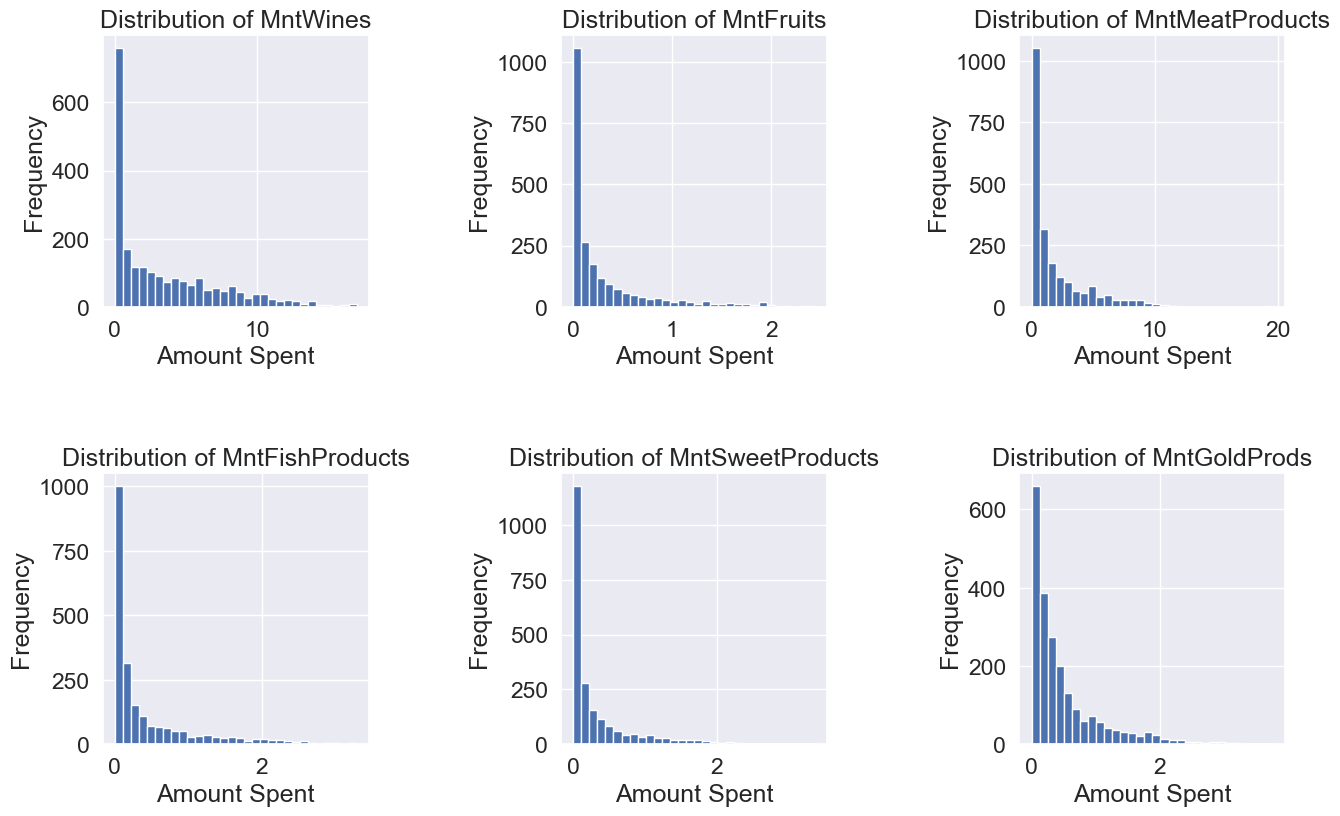

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'customerdf_joint' is your DataFrame and 'categories' is already defined
# For example, define categories if not defined:
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Number of subplot rows and columns
n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust the size as necessary
fig.tight_layout(pad=5.0)  # Adds space between plots

for i, category in enumerate(categories):
    ax = axes[i//n_cols, i%n_cols]  # Determine the position of the subplot
    customerdf_joint[category].hist(bins=30, ax=ax)
    ax.set_title(f'Distribution of {category}')
    ax.set_xlabel('Amount Spent')
    ax.set_ylabel('Frequency')
    
    # Printing descriptive statistics for each category
    print(f"Statistics for {category}:")
    print(customerdf_joint[category].describe(percentiles=[0.75, 0.8, 0.85, 0.9, 0.95]))

plt.show()


We will use 2 as this allows all the products to have a balanced report 


## Model Training and Evaluation of each Products

### Confusion Matrix and Classification report

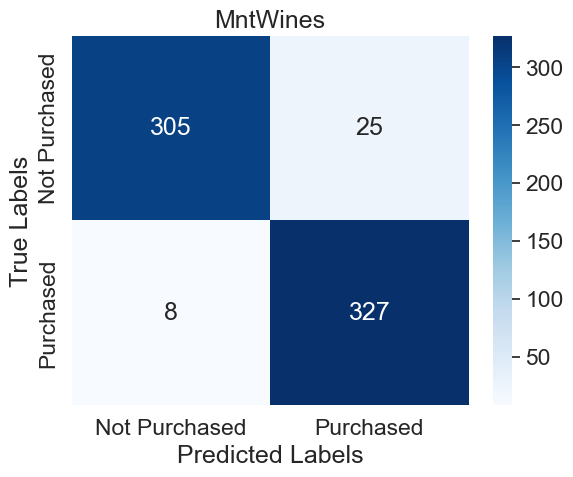


Rates for MntWines:
True Positive Rate (TPR): 0.9761194029850746
True Negative Rate (TNR): 0.9242424242424242
False Positive Rate (FPR): 0.07575757575757576
False Negative Rate (FNR): 0.023880597014925373

Classification Report for MntWines:
               precision    recall  f1-score   support

Not Purchased       0.97      0.92      0.95       330
    Purchased       0.93      0.98      0.95       335

     accuracy                           0.95       665
    macro avg       0.95      0.95      0.95       665
 weighted avg       0.95      0.95      0.95       665



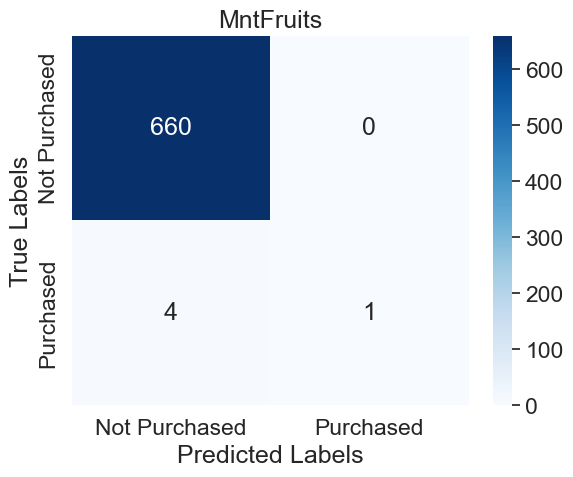


Rates for MntFruits:
True Positive Rate (TPR): 0.2
True Negative Rate (TNR): 1.0
False Positive Rate (FPR): 0.0
False Negative Rate (FNR): 0.8

Classification Report for MntFruits:
               precision    recall  f1-score   support

Not Purchased       0.99      1.00      1.00       660
    Purchased       1.00      0.20      0.33         5

     accuracy                           0.99       665
    macro avg       1.00      0.60      0.67       665
 weighted avg       0.99      0.99      0.99       665



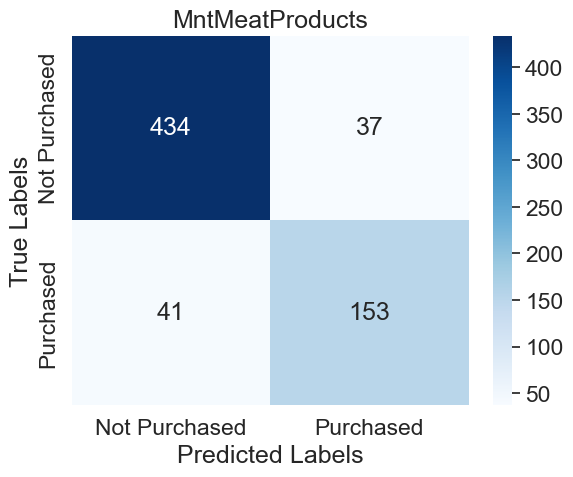


Rates for MntMeatProducts:
True Positive Rate (TPR): 0.788659793814433
True Negative Rate (TNR): 0.921443736730361
False Positive Rate (FPR): 0.07855626326963906
False Negative Rate (FNR): 0.211340206185567

Classification Report for MntMeatProducts:
               precision    recall  f1-score   support

Not Purchased       0.91      0.92      0.92       471
    Purchased       0.81      0.79      0.80       194

     accuracy                           0.88       665
    macro avg       0.86      0.86      0.86       665
 weighted avg       0.88      0.88      0.88       665



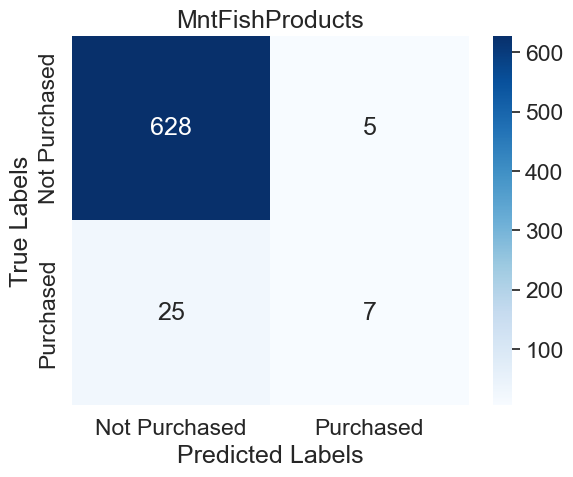


Rates for MntFishProducts:
True Positive Rate (TPR): 0.21875
True Negative Rate (TNR): 0.9921011058451816
False Positive Rate (FPR): 0.007898894154818325
False Negative Rate (FNR): 0.78125

Classification Report for MntFishProducts:
               precision    recall  f1-score   support

Not Purchased       0.96      0.99      0.98       633
    Purchased       0.58      0.22      0.32        32

     accuracy                           0.95       665
    macro avg       0.77      0.61      0.65       665
 weighted avg       0.94      0.95      0.94       665



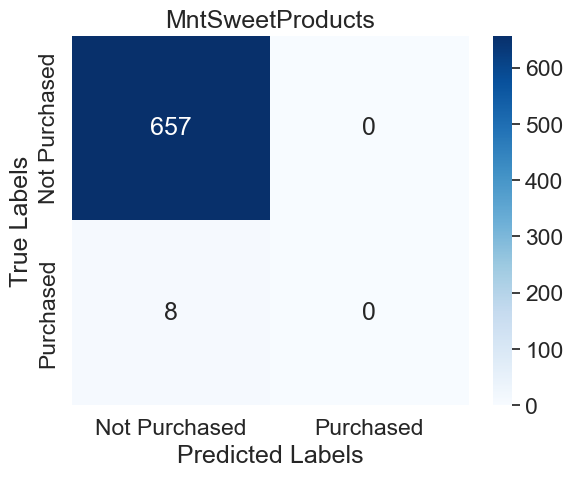


Rates for MntSweetProducts:
True Positive Rate (TPR): 0.0
True Negative Rate (TNR): 1.0
False Positive Rate (FPR): 0.0
False Negative Rate (FNR): 1.0

Classification Report for MntSweetProducts:
               precision    recall  f1-score   support

Not Purchased       0.99      1.00      0.99       657
    Purchased       1.00      0.00      0.00         8

     accuracy                           0.99       665
    macro avg       0.99      0.50      0.50       665
 weighted avg       0.99      0.99      0.98       665



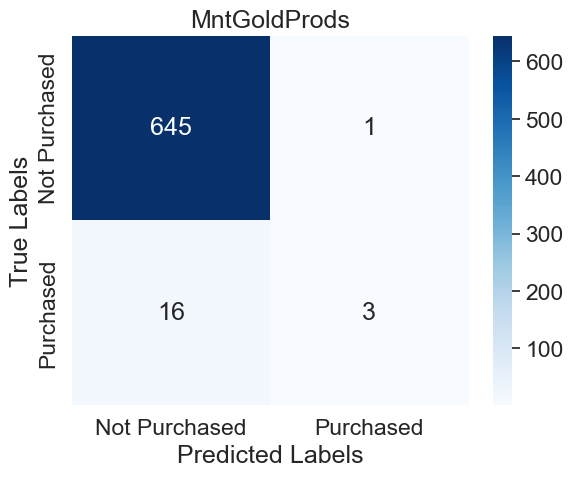


Rates for MntGoldProds:
True Positive Rate (TPR): 0.15789473684210525
True Negative Rate (TNR): 0.9984520123839009
False Positive Rate (FPR): 0.0015479876160990713
False Negative Rate (FNR): 0.8421052631578947

Classification Report for MntGoldProds:
               precision    recall  f1-score   support

Not Purchased       0.98      1.00      0.99       646
    Purchased       0.75      0.16      0.26        19

     accuracy                           0.97       665
    macro avg       0.86      0.58      0.62       665
 weighted avg       0.97      0.97      0.97       665



In [284]:
# Assuming these are the columns in your dataframe related to the products
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Example DataFrame preparation
# customerdf_joint already loaded and prepared with necessary transformations

# Define your threshold for what counts as a purchase
purchase_threshold = 2  # This might vary based on your specific case

# Convert amounts to binary (1 for purchased, 0 for not purchased)
for product in product_categories:
    customerdf_joint[f'Purchased_{product}'] = (customerdf_joint[product] > purchase_threshold).astype(int)

# Initialize dictionary to store models and predictions
models = {}
predictions = {}
reports = {}

# Iterate through each category to setup and train models
for category in product_categories:
    y = customerdf_joint[f'Purchased_{category}']
    X = customerdf_joint[['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    models[category] = clf
    predictions[category] = y_pred

    # Plot the confusion matrix for each category
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
    plt.title(f'{category}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Calculate TP, TN, FP, FN
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # Calculate rates
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)

    # Print rates for each category
    print(f"\nRates for {category}:")
    print(f"True Positive Rate (TPR): {TPR}")
    print(f"True Negative Rate (TNR): {TNR}")
    print(f"False Positive Rate (FPR): {FPR}")
    print(f"False Negative Rate (FNR): {FNR}")

    # Generate and print classification report
    report = classification_report(y_test, y_pred, target_names=["Not Purchased", "Purchased"], zero_division=1)
    reports[category] = report
    print(f"\nClassification Report for {category}:\n{reports[category]}")

    # Add separator line between products
    print("=" * 80)



### Overall Accuracy

In [285]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


### Optimize Model Parameters with Grid Search

In [286]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'), 
                           param_grid=param_grid, 
                           cv=3,  # Number of cross-validation folds
                           verbose=2, 
                           n_jobs=-1)  # Use all available cores

# Iterate over each product category
for category in categories:
    y = customerdf_joint[f'Purchased_{category}']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Predict using the best model
    y_pred = best_model.predict(X_test)
    
    # Save the model and predictions
    models[category] = best_model
    predictions[category] = y_pred
    
    # Generate and print classification report
    report = classification_report(y_test, y_pred, target_names=["Not Purchased", "Purchased"], zero_division=1)
    reports[category] = report
    print(f"Optimized Classification Report for {category}:\n{report}\n")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_dep

### Feature Importance

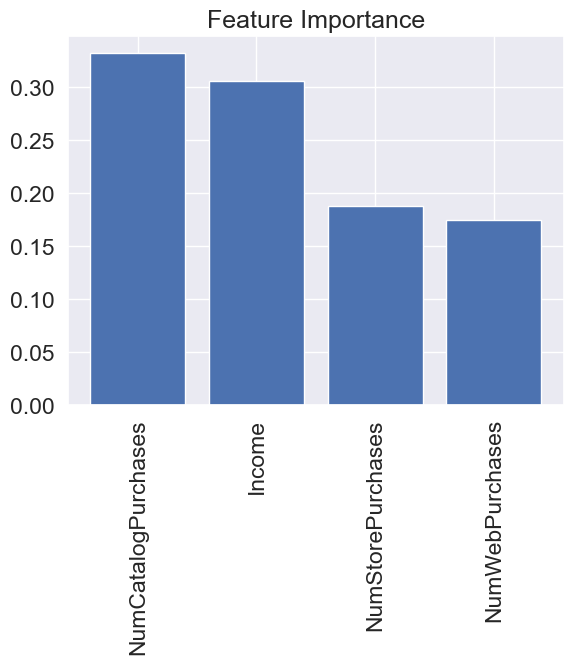

In [287]:
# Assuming `best_model` from the grid search
importances = best_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.show()


We can see that the most important feature is NumCatalogpPurchases, followed by income.

### K-Fold Cross-validation

In [288]:
from sklearn.model_selection import cross_val_score

# Set up cross-validation configuration
cv_folds = 5  # Number of folds in k-fold cross-validation

# Iterate over each product category
for category in categories:
    y = customerdf_joint[f'Purchased_{category}']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Define the classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv_folds, scoring='accuracy')
    
    # Train the model on the entire training data
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Save the model and predictions
    models[category] = clf
    predictions[category] = y_pred
    
    # Print results
    print(f"{category}:")
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Average CV Score: {cv_scores.mean():.3f}")
    print(f"Standard Deviation in CV Scores: {cv_scores.std():.3f}")
    
    # Generate and print classification report
    report = classification_report(y_test, y_pred, target_names=["Not Purchased", "Purchased"], zero_division=1)
    reports[category] = report
    print(f"Classification Report:\n{report}\n")


MntWines:
Cross-Validation Scores: [0.93247588 0.93870968 0.93870968 0.93225806 0.92580645]
Average CV Score: 0.934
Standard Deviation in CV Scores: 0.005
Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.97      0.92      0.95       330
    Purchased       0.93      0.98      0.95       335

     accuracy                           0.95       665
    macro avg       0.95      0.95      0.95       665
 weighted avg       0.95      0.95      0.95       665


MntFruits:
Cross-Validation Scores: [0.9903537  0.99677419 0.99677419 0.99032258 0.99032258]
Average CV Score: 0.993
Standard Deviation in CV Scores: 0.003
Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.99      1.00      1.00       660
    Purchased       1.00      0.20      0.33         5

     accuracy                           0.99       665
    macro avg       1.00      0.60      0.67       665
 weighted avg       0.99      0.

# Conclusion

# TO BE CONTINUED